# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
OPTIMIZER = [('SGD', keras.optimizers.SGD), ('RMSprop', keras.optimizers.RMSprop), ('Adam', keras.optimizers.Adam)]
LEARNING_RATE = [1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for name, opt in OPTIMIZER:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with opt = %s, lr = %.6f" % (name, lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = opt(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-%s" % (name, str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with opt = SGD, lr = 0.001000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for up

50000/50000 [==============================] - 3s 62us/step - loss: 1.6805 - acc: 0.4147 - val_loss: 1.6845 - val_acc: 0.4139
Epoch 49/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6769 - acc: 0.4177 - val_loss: 1.6804 - val_acc: 0.4184
Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6736 - acc: 0.4179 - val_loss: 1.6782 - val_acc: 0.4188
Experiment with opt = SGD, lr = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        

50000/50000 [==============================] - 3s 62us/step - loss: 2.0244 - acc: 0.2954 - val_loss: 2.0253 - val_acc: 0.2958
Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0214 - acc: 0.2961 - val_loss: 2.0223 - val_acc: 0.2966
Experiment with opt = RMSprop, lr = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (N

50000/50000 [==============================] - 4s 73us/step - loss: 0.7508 - acc: 0.7329 - val_loss: 2.0856 - val_acc: 0.4615
Experiment with opt = RMSprop, lr = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.9577 - acc: 0.2926 - val_loss: 1.7605 - val_acc: 0.3759
Epoch 2/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7264 - acc: 0.3804 - val_loss: 1.6626 - val_acc: 0.3990
Epoch 3/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.6294 - acc: 0.4183 - val_loss: 1.6169 - val_acc: 0.4231
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5694 - acc: 0.4413 - val_loss: 1.5128 - val_acc: 0.4647
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5108 - acc: 0.4608 - val_loss: 1.5037 - val_acc: 0.4574
Epoch 6/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4680 - acc: 0.4759 - val_loss: 1.4826 - val_acc: 0.4704
Epoch 7/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4260 - acc: 0.4918 - val_loss: 1.4625 - val_acc

50000/50000 [==============================] - 4s 77us/step - loss: 1.7335 - acc: 0.3892 - val_loss: 1.6839 - val_acc: 0.4072
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.6456 - acc: 0.4215 - val_loss: 1.6269 - val_acc: 0.4253
Epoch 4/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5871 - acc: 0.4442 - val_loss: 1.5739 - val_acc: 0.4483
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5477 - acc: 0.4548 - val_loss: 1.5474 - val_acc: 0.4584
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5060 - acc: 0.4712 - val_loss: 1.5260 - val_acc: 0.4587
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4758 - acc: 0.4812 - val_loss: 1.4913 - val_acc: 0.4716
Epoch 8/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4499 - acc: 0.4896 - val_loss: 1.4972 - val_acc: 0.4677
Epoch 9/50
50000/50000 [============================

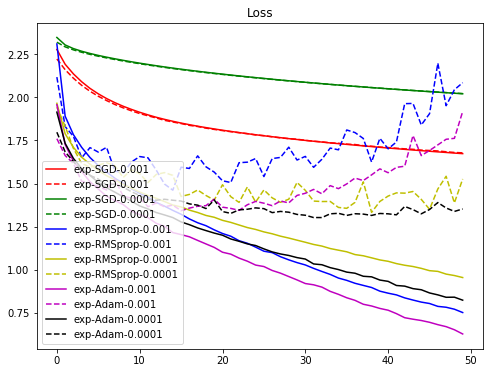

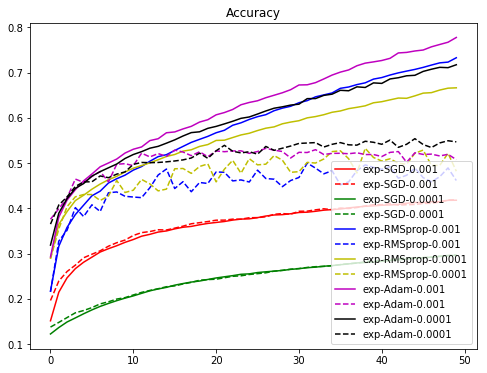

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()